In [41]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import argrelextrema
data_prop = []
data_vis = []

with open("Main_part/data/exp2/12thApril/Denis_Davl_no_imp.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:  
            data_vis.append(datas) 

with open("Main_part/data/exp2/12thApril/Denis_Davl_imp.txt", "r") as my_file:
    for line in my_file:  
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas) 

data_prop = np.array(data_prop, dtype=float)
data_prop = data_prop[data_prop[:,0] < 0.4]

data_vis = np.array(data_vis, dtype=float)
data_vis = data_vis[data_vis[:,0] < 0.4]
print(data_vis[:,0].mean(),data_prop[:,0].mean())

0.356974656810982 0.3663443640124095


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
def process_file(path_to_file):
    data = []
    with open(path_to_file, "r") as my_file:
        for line in my_file:
            datas = line.split() 
            if float(datas[0]) > 0:  
                data.append(datas) 
    data = np.array(data, dtype=float)
    data = data[data[:,0] < 0.4]
    return data

my_dir = "Main_part/data/exp2/12thApril/"
vis_data = {}
prop_data = {}

for file in os.listdir(my_dir):
    if file.endswith(".txt"):
        name_trial = file.split('.')[0].split("_")
        path_to_file = os.path.join(my_dir, file)
        data = process_file(path_to_file)
        if (name_trial[1] == 'vis'):
            vis_data[name_trial[0]] = data
        else: 
            prop_data[name_trial[0]] = data



In [6]:
vis_data

{'Ali': array([[3.270e-01, 1.300e-02, 4.090e+00],
        [3.250e-01, 1.000e-02, 4.120e+00],
        [3.240e-01, 9.000e-03, 4.150e+00],
        ...,
        [3.720e-01, 1.400e-02, 7.320e+01],
        [3.810e-01, 1.500e-02, 7.324e+01],
        [3.910e-01, 1.800e-02, 7.327e+01]]),
 'DenisDavl': array([[3.9900e-01, 3.0000e-03, 6.1720e+01],
        [3.9700e-01, 3.0000e-03, 6.1750e+01],
        [3.9500e-01, 3.0000e-03, 6.1790e+01],
        ...,
        [3.7200e-01, 8.0000e-03, 2.3026e+02],
        [3.7500e-01, 1.3000e-02, 2.3029e+02],
        [3.8200e-01, 2.0000e-02, 2.3032e+02]]),
 'Denis': array([[3.8300e-01, 5.2000e-02, 9.9200e+00],
        [3.6800e-01, 2.1000e-02, 9.9500e+00],
        [3.5700e-01, 2.0000e-02, 9.9800e+00],
        ...,
        [2.3500e-01, 4.0000e-03, 1.3276e+02],
        [2.3800e-01, 5.0000e-03, 1.3279e+02],
        [2.4400e-01, 7.0000e-03, 1.3283e+02]]),
 'Diana': array([[3.9200e-01, 1.7000e-02, 1.8210e+01],
        [3.8100e-01, 1.6000e-02, 1.8240e+01],
        [3.7300

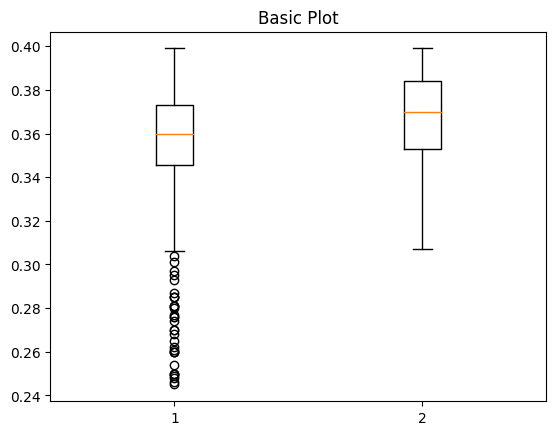

In [40]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([data_vis[:,0],data_prop[:,0]])
plt.show()

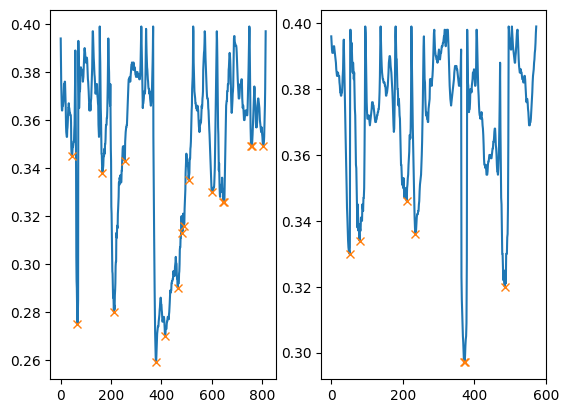

(7,) 0.32285714285714284 0.297
(17,) 0.3172352941176471 0.259


In [36]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(1,2)

x = -data_prop[:,0]
peaks, _ = find_peaks(x, width = 3,height=-0.35)
x = data_prop[:,0]
ax[1].plot(x)
ax[1].plot(peaks, x[peaks], "x")
prop_peaks = x[peaks]

x = -data_vis[:,0]
peaks, _ = find_peaks(x, width = 3,height=-0.35)
x = data_vis[:,0]
ax[0].plot(x)
ax[0].plot(peaks, x[peaks], "x")
vis_peaks = x[peaks]
plt.show()

print(prop_peaks.shape,prop_peaks.mean(),prop_peaks.min())
print(vis_peaks.shape,vis_peaks.mean(), vis_peaks.min())

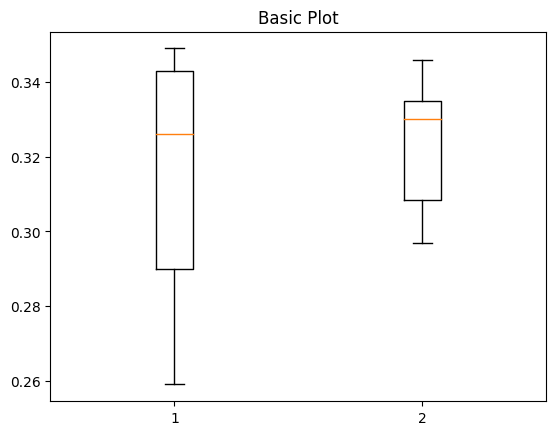

In [37]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([vis_peaks,prop_peaks])
plt.show()

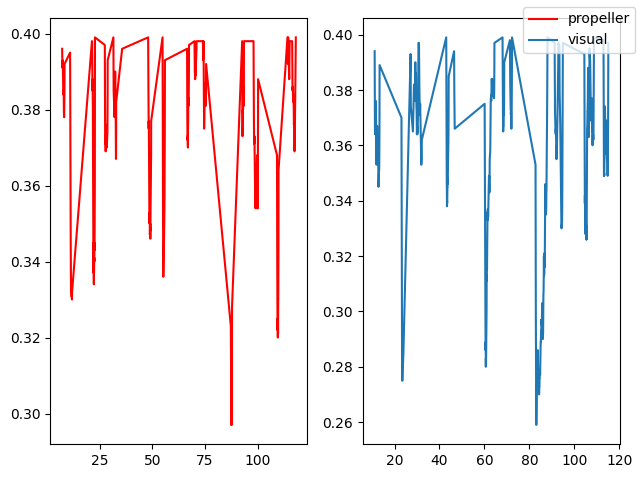

In [38]:
fig, ax = plt.subplots(1,2)
ax[0].plot(data_prop[:,2],data_prop[:,0],'r', label='propeller')
ax[1].plot(data_vis[:,2],data_vis[:,0], label='visual')
fig.tight_layout()
fig.legend()
plt.show()

0.4816619981325865
0.246
51.61


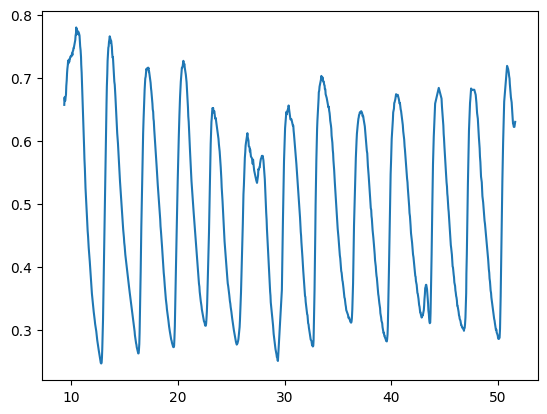

In [98]:
import numpy as np
data_prop = []
with open("data/reaction_time/exp1_reaction_Denis_Grankin.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas)

print(np.array(data_prop, dtype=float).mean(axis = 0)[0])
print(np.array(data_prop, dtype=float).min(axis = 0)[0])
print(np.array(data_prop, dtype=float).max(axis = 0)[2])
data_prop =  np.array(data_prop, dtype=float)
fig, ax = plt.subplots()
ax.plot(data_prop[:,2],data_prop[:,0])
plt.show()

(14, 2)


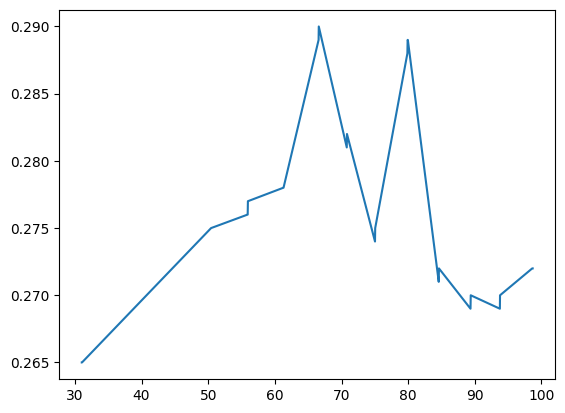

In [102]:

data = []
with open("data/distance_measurement/exp1_distance_Denis_Grankin_25.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:
            data.append(datas)

data =  np.array(data, dtype=float)


threshold = 1
diff = np.empty(data.shape)

diff[0] = np.inf  # always retain the 1st element
diff[1:] = np.diff(data)

mask = diff > threshold

new_arr = data[mask]

mask = data[:,1] > 0.35
far = data[mask]
print(far.shape)
min_dt_dist = 1

close = data[~mask]
fig, ax = plt.subplots()
ax.plot(close[:,0],close[:,1])
plt.show()
# print(argrelextrema(data, np.less))

In [ ]:
import numpy as np
data_prop = []
with open("Main_part/data/exp1_dist/protocol_relocations/exp1_distance_honest_filedVictordd.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        # if float(datas[0]) > 0:
        data_prop.append(datas)

# Main_part\data\exp1_dist\protocol_relocations\exp1_distance_honest_filedVictordd.txt
print(data_prop)
# print(np.array(data, dtype=float).mean(axis = 0)[0])
# print(np.array(data, dtype=float).min(axis = 0)[0])
# print(np.array(data, dtype=float).max(axis = 0)[2])